# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_____________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [65]:
inputs = keras.Input(shape=(784,))
#encoder
l1 = layers.Dense(128, activation="tanh")(inputs)
l2 = layers.Dense(64, activation="tanh")(l1)
#latent space
l3 = layers.Dense(32, activation="tanh")(l2)
#decoder
l4 = layers.Dense(64, activation="tanh")(l3)
l5 = layers.Dense(128, activation="tanh")(l4)
outputs = layers.Dense(28*28)(l4)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_98 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_99 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_100 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_102 (Dense)            (None, 784)               50960     
Total params: 163,888
Trainable params: 163,888
Non-trainable params: 0
____________________________________________________

In [66]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [67]:
#taken from solution
# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#normalize
x_train = x_train.astype('float32') / 255.
#reshape input to 1D
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

In [68]:
history = model.fit(x_train, x_train, batch_size=64, epochs=100)

Epoch 1/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0280
Epoch 2/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0182
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0178
Epoch 4/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0176
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0175
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0173
Epoch 7/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0171
Epoch 8/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0168
Epoch 9/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0165
Epoch 10/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0162
Epoch 11/100
938/938 [==============================] - 3s 4ms/step - loss: 0.0159
Epoch 12/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0157
Epoch 13/100


In [105]:
predictions = model.predict(x_train)

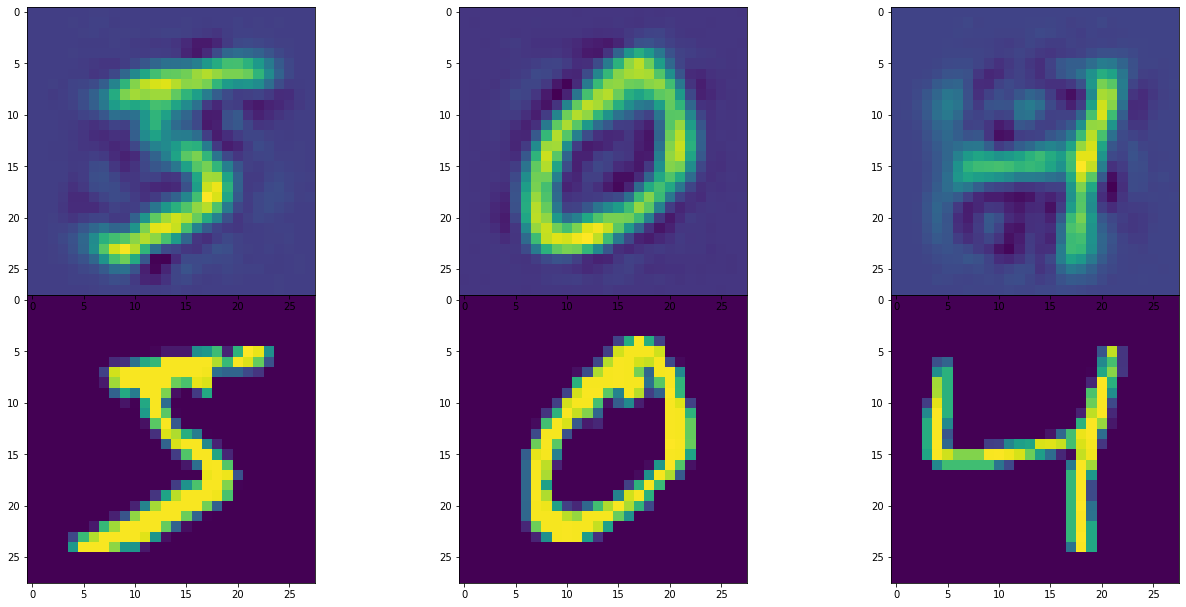

In [106]:
import matplotlib.pyplot as plt

fig = plt.figure()
axes = fig.add_axes([1,1,1,1])
axes2 = fig.add_axes([2,1,1,1])
axes3 = fig.add_axes([3,1,1,1])
axes4 = fig.add_axes([1,2,1,1])
axes5 = fig.add_axes([2,2,1,1])
axes6 = fig.add_axes([3,2,1,1])

axes.imshow(x_train[0].reshape(28, 28))
axes2.imshow(x_train[1].reshape(28, 28))
axes3.imshow(x_train[2].reshape(28, 28))
axes4.imshow(predictions[0].reshape(28, 28))
axes5.imshow(predictions[1].reshape(28, 28))
axes6.imshow(predictions[2].reshape(28, 28))

In [109]:
reconstruction_error = np.sum(np.abs(x_train-predictions) *np.abs(x_train-predictions),axis=1)

(array([1.840e+02, 1.344e+03, 1.787e+03, 1.615e+03, 1.773e+03, 2.243e+03,
        2.984e+03, 3.783e+03, 4.253e+03, 4.404e+03, 4.367e+03, 4.354e+03,
        4.012e+03, 3.772e+03, 3.256e+03, 2.910e+03, 2.390e+03, 2.110e+03,
        1.640e+03, 1.351e+03, 1.126e+03, 8.910e+02, 7.140e+02, 5.860e+02,
        4.650e+02, 3.910e+02, 2.730e+02, 2.300e+02, 1.810e+02, 1.510e+02,
        1.060e+02, 8.300e+01, 5.400e+01, 4.700e+01, 5.800e+01, 2.700e+01,
        1.900e+01, 1.300e+01, 1.400e+01, 5.000e+00, 9.000e+00, 7.000e+00,
        3.000e+00, 7.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00]),
 array([ 1.6822357,  2.3725872,  3.062939 ,  3.7532904,  4.443642 ,
         5.1339936,  5.824345 ,  6.5146966,  7.205048 ,  7.8953996,
         8.585752 ,  9.276103 ,  9.9664545, 10.656806 , 11.3471575,
        12.037509 , 12.72786  , 13.418212 , 14.108563 , 14.798916 ,
        15.489267 , 16.179619 , 16.86997  , 17.560322 , 18.250673 ,
        18.941025 , 19.631376 , 20.3

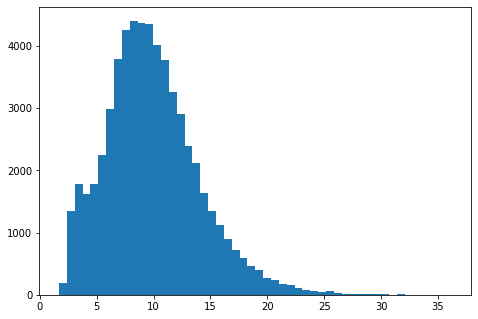

In [113]:
fig = plt.figure()
axes = fig.add_axes([1,1,1,1])
axes.hist(reconstruction_error, bins=50)

In [117]:
outliers = x_train[reconstruction_error>25]
outlier_predictions = predictions[reconstruction_error>25]

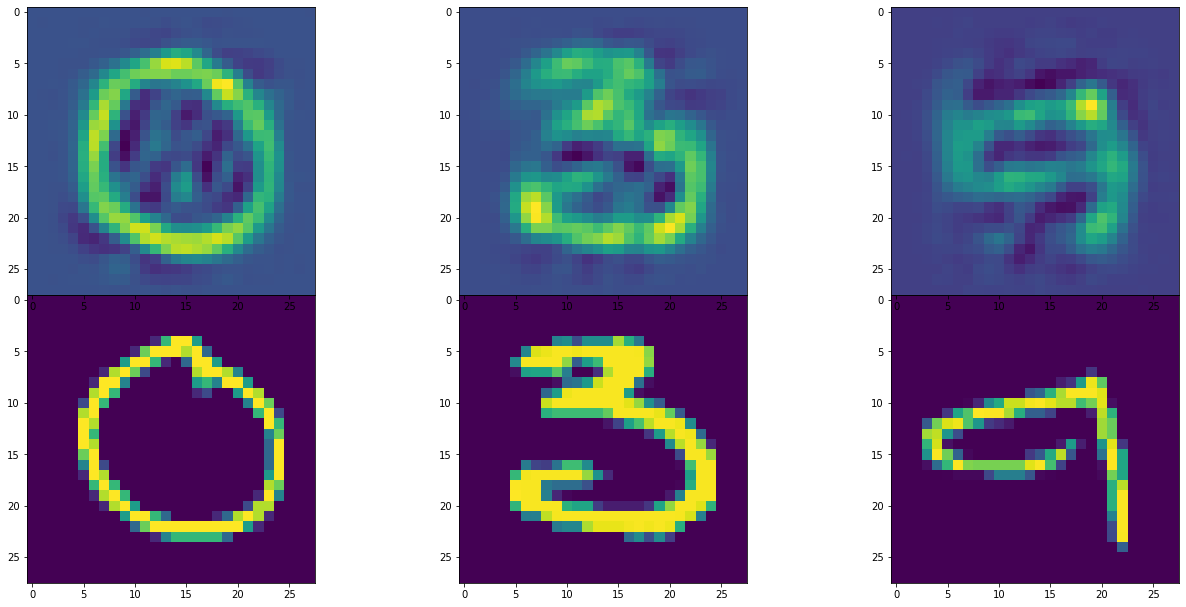

In [118]:
fig = plt.figure()
axes = fig.add_axes([1,1,1,1])
axes2 = fig.add_axes([2,1,1,1])
axes3 = fig.add_axes([3,1,1,1])
axes4 = fig.add_axes([1,2,1,1])
axes5 = fig.add_axes([2,2,1,1])
axes6 = fig.add_axes([3,2,1,1])

axes.imshow(outliers[0].reshape(28, 28))
axes2.imshow(outliers[1].reshape(28, 28))
axes3.imshow(outliers[2].reshape(28, 28))
axes4.imshow(outlier_predictions[0].reshape(28, 28))
axes5.imshow(outlier_predictions[1].reshape(28, 28))
axes6.imshow(outlier_predictions[2].reshape(28, 28))